In [1]:
using CSV
using DataFrames
using JuMP
using Plots
using Random
using Statistics
using LinearAlgebra
using Distributions
using BipartiteMatching
using Gurobi
using LinearAlgebra
using SymPy
using NLsolve
using LaTeXStrings


# Proof of Theorem 3

In [2]:
# Define an expression to compute the lower bound of mu(1,0) - mu(1/2,1/2) in each grid
@vars delta alphaf alpha x_lb x1_lb x2_lb x_ub x1_ub x2_ub
lb_comparison = -x_ub-exp(-(alphaf+alpha)*x_lb)*(1+(alphaf+alpha+2*delta)*x_ub)+0.5*x1_lb+0.5*x2_lb + 0.5*exp(
    -(alphaf+delta)*x1_ub-0.5*(alphaf+alpha+2*delta)*x2_ub)*(1+(alphaf)*x1_lb+0.5*(alphaf+alpha)*x2_lb)+0.5*exp(
    -0.5*(alphaf+alpha+2*delta)*x1_ub-(alpha+delta)*x2_ub)*(1+0.5*(alphaf+alpha)*x1_lb+(alpha)*x2_lb)

# Define a Julia function for the equation to solve x
function equation_x!(F, x, alphaf_val, alpha_val)
    F[1] = exp(-(alphaf_val + alpha_val)*x[1]) - x[1]
end

# Define a Julia function for the equation to solve x1
function equation_x1!(F, x, alphaf_val, alpha_val)
    F[1] = exp(-0.5*(alphaf_val + alpha_val)*x[1] + 2*alpha_val*(log(x[1]) + alphaf_val*x[1])/(alphaf_val + alpha_val)) + 2*(log(x[1]) + alphaf_val*x[1])/(alphaf_val + alpha_val)
end

# Define a Julia function to evaluate sol_f_perturbed
tolerance = 1e-5
function comp_f_func(alphaf_val, alpha_val, delta_val)
    x_sol = nlsolve((F, x) -> equation_x!(F, x, alphaf_val, alpha_val), [0.2], autodiff=:forward, ftol=tolerance).zero[1]
    x_sol_ub, x_sol_lb = x_sol+tolerance, x_sol-tolerance
    x1_sol = nlsolve((F, x) -> equation_x1!(F, x, alphaf_val, alpha_val), [0.2], autodiff=:forward, ftol=tolerance).zero[1]
    x1_sol_ub, x1_sol_lb = x1_sol+tolerance, x1_sol-tolerance
    x2_sol_ub, x2_sol_lb = -2*(log(x1_sol_lb) + alphaf_val*x1_sol_lb)/(alphaf_val + alpha_val), -2*(log(x1_sol_ub) + alphaf_val*x1_sol_ub)/(alphaf_val + alpha_val)
    lb_comparison_val = subs(lb_comparison, (alphaf, alphaf_val), (alpha, alpha_val), 
        (x_lb, x_sol_lb*(1-delta)), (x_ub, x_sol_ub), 
        (x1_lb, x1_sol_lb*(1-2*delta)), (x2_lb, x2_sol_lb*(1-2*delta)), 
        (x1_ub, x1_sol_ub), (x2_ub, x2_sol_ub),(delta,delta_val))
    return lb_comparison_val > 0
end

function calculate_lb_comparison_matrix(delta_val)

    # Adjust the upper limit as needed
    alphaf_range = delta_val:delta_val:exp(1)
    alpha_range = 0.0:delta_val:exp(1)/2
    results_matrix = Matrix{Int}(undef, length(alphaf_range), length(alpha_range))

    for (i, alphaf_val) in enumerate(alphaf_range)
        print(alphaf_val, '\n')
        for (j, alpha_val) in enumerate(alpha_range)
            if alpha_val <= min(alphaf_val, exp(1) - alphaf_val)
                results_matrix[i, j] = comp_f_func(alphaf_val, alpha_val, delta_val)
            else
                results_matrix[i, j] = -1  # Assign -1 when the condition is not satisfied
            end
        end
    end
    
    return results_matrix

end


calculate_lb_comparison_matrix (generic function with 1 method)

In [ ]:
# delta = 0.01: 15 min
delta_val = 0.01
results_matrix = calculate_lb_comparison_matrix(delta_val)
CSV.write("compare01.csv", DataFrame(results_matrix, :auto), writeheader=false)

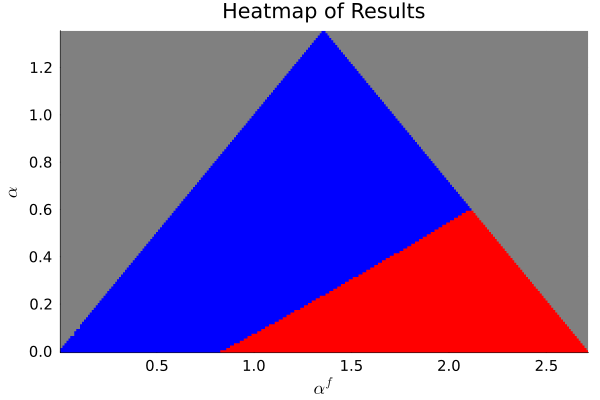

In [17]:
loaded_dataframe = CSV.File("compare01.csv", header=false) |> DataFrame
loaded_matrix = Matrix(loaded_dataframe)

# Create a heatmap to visualize the results
color_palette = cgrad([:gray, :blue, :red], categorical=true)

heatmap(delta_val:delta_val:exp(1), 0.0:delta_val:exp(1)/2, transpose(results_matrix), color=:auto, colormap=color_palette, colorbar=false, title="Heatmap of Results",
        xlabel=L"$\alpha^f$", ylabel=L"$\alpha$", tickfont=font(10), guidefontsize=12)

In [ ]:
# delta_val = 0.005: 60 min
delta_val = 0.005
results_matrix = calculate_lb_comparison_matrix(delta_val)
CSV.write("compare005.csv", DataFrame(results_matrix, :auto), writeheader=false)

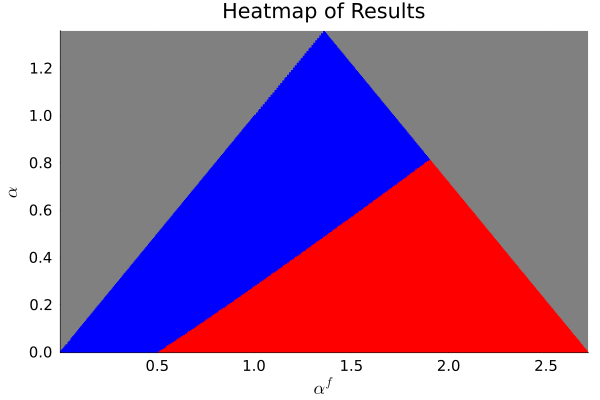

In [20]:
loaded_dataframe = CSV.File("compare005.csv", header=false) |> DataFrame
loaded_matrix = Matrix(loaded_dataframe)

# Create a heatmap to visualize the results
color_palette = cgrad([:gray, :blue, :red], categorical=true)

heatmap(delta_val:delta_val:exp(1), 0.0:delta_val:exp(1)/2, transpose(results_matrix), color=:auto, colormap=color_palette, colorbar=false, title="Heatmap of Results",
        xlabel=L"$\alpha^f$", ylabel=L"$\alpha$", tickfont=font(10), guidefontsize=12)

In [ ]:
# delta_val = 0.0025: 4 hours
delta_val = 0.0025
results_matrix = calculate_lb_comparison_matrix(delta_val)
CSV.write("compare0025.csv", DataFrame(results_matrix, :auto), writeheader=false)

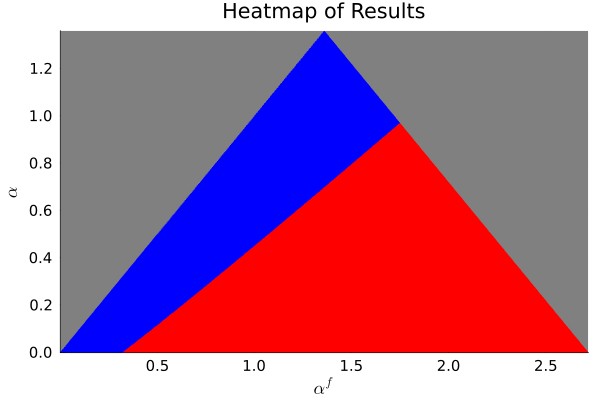

In [22]:
loaded_dataframe = CSV.File("compare0025.csv", header=false) |> DataFrame
loaded_matrix = Matrix(loaded_dataframe)

# Create a heatmap to visualize the results
color_palette = cgrad([:gray, :blue, :red], categorical=true)

heatmap(delta_val:delta_val:exp(1), 0.0:delta_val:exp(1)/2, transpose(results_matrix), color=:auto, colormap=color_palette, colorbar=false, title="Heatmap of Results",
        xlabel=L"$\alpha^f$", ylabel=L"$\alpha$", tickfont=font(10), guidefontsize=12)

In [ ]:
# delta_val = 0.001: 20 hours
delta_val = 0.001
results_matrix = calculate_lb_comparison_matrix(delta_val)
CSV.write("compare001.csv", DataFrame(results_matrix, :auto), writeheader=false)

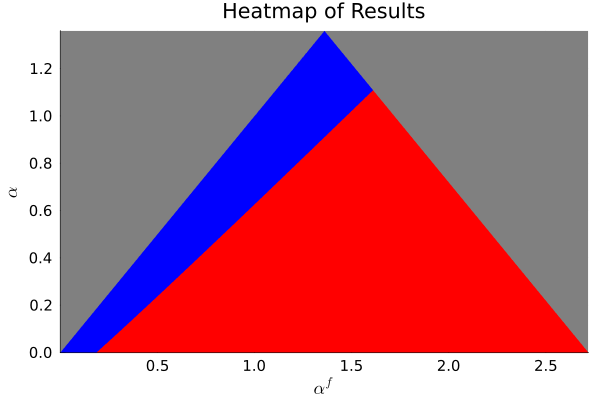

In [4]:
loaded_dataframe = CSV.File("compare001.csv", header=false) |> DataFrame
loaded_matrix = Matrix(loaded_dataframe)

# Create a heatmap to visualize the results
color_palette = cgrad([:gray, :blue, :red], categorical=true)

heatmap(delta_val:delta_val:exp(1), 0.0:delta_val:exp(1)/2, transpose(results_matrix), color=:auto, colormap=color_palette, colorbar=false, title="Heatmap of Results",
        xlabel=L"$\alpha^f$", ylabel=L"$\alpha$", tickfont=font(10), guidefontsize=12)